## Diabetes Prediction 

#### Import the necessar libraries and load the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Check the correlation of output with the features using heatmap

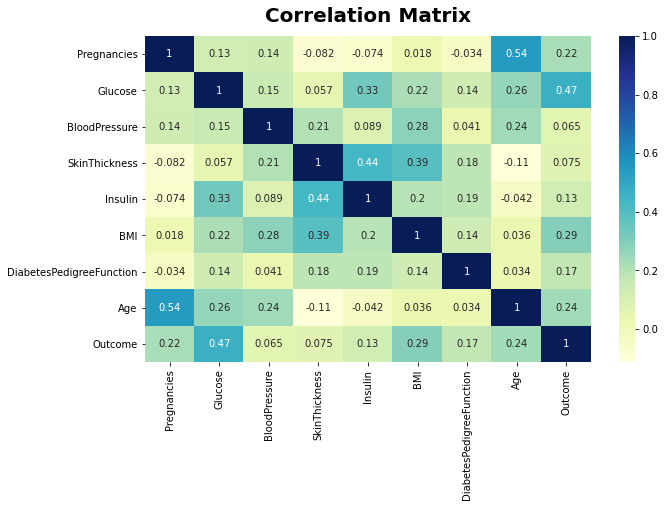

In [6]:
#correlation
plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), annot= True, cmap="YlGnBu")
plt.title('Correlation Matrix', y=1.025, fontweight="bold", fontsize= 20)
plt.show()

- Glucose, BMI, Age, Pregnancies are highly related
- BloodPressure, SkinThickness, Insulin, DiabetesPedigreeFunction are less related

In [7]:
#Check balance of the outcome
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

- Diabetic patients : 268
- NonDiabetic patients : 500

In [8]:
X = df.drop(columns=["Outcome"])
y = df.Outcome

In [9]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


- there are 0 values in Glucose,BloodPressure,SkinThickness,Insulin,BMI columns which isnt practically possible
- Hence, impute the zero values with their mean

#### Impute all the 0 values column wise with their mean

In [10]:
#Impute all the 0 values column wise with their mean
#It returns the input elements as an ndarray
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= 0, strategy='mean')
X1= imputer.fit_transform(X.iloc[:,:])

In [11]:
X1

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

#### Splitting Data

- Splitting the dataset into a training set and a test set to understand model performance.
- Here, the Dataset is broken into two parts in a ratio of 80:20. It means 80% of data will be used for model training and 20% for model testing.
- Stratify= y splits the data w.r.t the Dependent Variable equally to avoid Data Imbalance.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2,stratify=y,random_state=42)

#### Deploying the model

- Import the class — RandomForestClassifier, Instantiate the model using the LogisticRegression() function.
- Then, fit your model on the train set using fit() and check the training and testing accuracy score.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf = RandomForestClassifier()
clf.fit(X_train, y_train.ravel()) #.ravel() returns the input elements as an ndarray

RandomForestClassifier()

In [17]:
print("-"*75)
print("training_score  is : {}".format(clf.score(X_train, y_train)))
print("Testing_Score is : {}".format(clf.score(X_test, y_test)))
print("-"*75)

---------------------------------------------------------------------------
training_score  is : 1.0
Testing_Score is : 0.7532467532467533
---------------------------------------------------------------------------


#### Hyper Parameter Tuning of RandomForestClassifier using RandomizedSearchCV

In [18]:
param= {'n_estimators': [int(x) for x in np.linspace(100,1200,12)],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [1,2,4,5,7,8,10,12,15],
    'min_samples_split' : [1,2,3,4,5],
    'min_samples_leaf' : [1,2,3,4,5],
}

In [19]:
from sklearn.model_selection import RandomizedSearchCV
randomsearch_cv = RandomizedSearchCV(estimator = clf,param_distributions= param,n_iter=10,cv=3,scoring='roc_auc',n_jobs=-1,
    verbose=3,random_state=100)

In [20]:
randomsearch_cv.fit(X_train, y_train.ravel())

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   23.8s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 4, 5, 7, 8, 10, 12,
                                                      15],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=100, scoring='roc_auc', verbose=3)

In [21]:
randomsearch_cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=3,
                       n_estimators=400)

In [22]:
randomsearch_cv.best_params_

{'n_estimators': 400,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 7,
 'criterion': 'entropy'}

In [23]:
print("-"*75)
print("training_score  is : {}".format(randomsearch_cv.score(X_train, y_train)))
print("Testing_Score is : {}".format(randomsearch_cv.score(X_test, y_test)))
print("-"*75)

---------------------------------------------------------------------------
training_score  is : 0.9762383177570093
Testing_Score is : 0.8164814814814815
---------------------------------------------------------------------------


- Testing_Score has incresed due to Hyper Parameter Tuning

#### Create a pickle file and dump the model

In [24]:
import pickle
pickle.dump(randomsearch_cv, open("rfc_model.pkl","wb"))

In [25]:
model = pickle.load(open("rfc_model.pkl","rb"))

#### Model Evaluation using Input data

- predict the first and second row of the dataset and check the outcome

In [26]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [27]:
model.predict(df.iloc[0:1,:-1])

array([0], dtype=int64)

In [28]:
model.predict(df.iloc[1:2,:-1])

array([0], dtype=int64)

- Both the rowa show the correct outcome
- Hence Our Model has accurately predicted the diabetic outcome 